In [22]:
import pandas as pd
import numpy as np
data = pd.read_csv("spambase/spambase.data")

# Problem 1

## Part A

In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.25)
spam = train[train.columns[-1]].sum()
total = len(train)
spam/total

0.38869565217391305

In [4]:
from sklearn.linear_model import LogisticRegression
X = train.drop(train.columns[-1], axis=1)
y = train[train.columns[-1]]
model = LogisticRegression(random_state=0).fit(X, y)

In [5]:
y_true = test[test.columns[-1]]
X_test = test.drop(train.columns[-1], axis=1)
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_true, y_pred)

In [6]:
tn, fp, fn, tp = cm.ravel()
print("True Negative:", tn, "False Positives:", fp, "False Negatives:", fn, "True Positives:", tp)

True Negative: 647 False Positives: 32 False Negatives: 55 True Positives: 416


In [7]:
accuracy = model.score(X_test, y_true)
error = 1 - accuracy
print("Accuracy:", accuracy, "Error:", error)

Accuracy: 0.9243478260869565 Error: 0.07565217391304346


In [9]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print("Precision:", precision, "Recall:", recall, "F1:", f1)

Precision: 0.9285714285714286 Recall: 0.8832271762208068 F1: 0.9053318824809575


## Part B

In [62]:
model.coef_

array([[-2.62525495e-01, -1.70449634e-01,  1.61299150e-01,
         7.69403523e-01,  5.81458947e-01,  7.55585309e-01,
         2.63380899e+00,  5.23796549e-01,  3.34606554e-01,
         6.52162155e-02, -4.73759177e-01, -1.28582282e-01,
        -3.39319510e-02,  1.02622367e-01,  9.23593285e-01,
         8.08299196e-01,  9.41513048e-01,  1.61454995e-02,
         9.30082298e-02,  1.17080627e+00,  2.62180292e-01,
         1.99502851e-01,  2.27253491e+00,  3.45374512e-01,
        -1.66335571e+00, -1.41467561e+00, -3.32250494e+00,
         7.65956156e-01, -1.21903843e+00, -1.14021199e+00,
        -6.68426068e-01, -1.69169573e-01, -5.62458149e-01,
        -2.32777011e-01, -9.27214072e-01,  7.30910194e-01,
        -4.50073992e-02, -4.24806482e-01, -8.08277533e-01,
        -7.45339543e-01, -1.22982862e+00, -1.83372232e+00,
        -7.79669804e-01, -1.22642123e+00, -7.73155775e-01,
        -1.19819490e+00, -6.75569475e-01, -1.41848700e+00,
        -1.01157921e+00, -1.49382603e-01, -6.78974425e-0

The columns that have the largest contributions are char_freq_$, word_freq_remove, word_freq_000, word_freq_george. 

## Part C

In [32]:
from sklearn.metrics import accuracy_score
probs = model.predict_proba(X_test)
thresholds = [.1 * x for x in range(1,10)]
accuracy = []
for t in thresholds:
    preds = np.where(model.predict_proba(X_test)[:,1] > t, 1, 0)
    accuracy.append(accuracy_score(y_true, preds))
for i in range(len(thresholds)):
    print("T:", thresholds[i], "Accuracy:", accuracy[i])

T: 0.1 Accuracy: 0.8104347826086956
T: 0.2 Accuracy: 0.8773913043478261
T: 0.30000000000000004 Accuracy: 0.9078260869565218
T: 0.4 Accuracy: 0.9217391304347826
T: 0.5 Accuracy: 0.9243478260869565
T: 0.6000000000000001 Accuracy: 0.9182608695652174
T: 0.7000000000000001 Accuracy: 0.8965217391304348
T: 0.8 Accuracy: 0.8669565217391304
T: 0.9 Accuracy: 0.8191304347826087


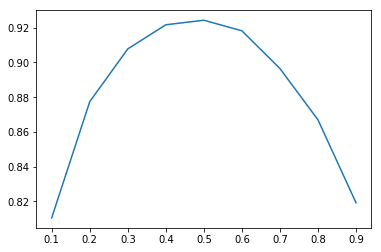

In [31]:
import matplotlib.pyplot as plt
plt.plot(thresholds, accuracy)
plt.show()

# Problem 2

## Part A

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
ks = [i for i in range(2,15)]
accuracy = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    accuracy.append(knn.score(X_test, y_true))
for i in range(len(ks)):
    print("K:", ks[i], "Accuracy:", accuracy[i], "Error:",1-accuracy[i])


K: 2 Accuracy: 0.788695652173913 Error: 0.21130434782608698
K: 3 Accuracy: 0.8008695652173913 Error: 0.19913043478260872
K: 4 Accuracy: 0.78 Error: 0.21999999999999997
K: 5 Accuracy: 0.788695652173913 Error: 0.21130434782608698
K: 6 Accuracy: 0.782608695652174 Error: 0.21739130434782605
K: 7 Accuracy: 0.7869565217391304 Error: 0.21304347826086956
K: 8 Accuracy: 0.78 Error: 0.21999999999999997
K: 9 Accuracy: 0.7913043478260869 Error: 0.20869565217391306
K: 10 Accuracy: 0.7773913043478261 Error: 0.2226086956521739
K: 11 Accuracy: 0.7817391304347826 Error: 0.2182608695652174
K: 12 Accuracy: 0.7782608695652173 Error: 0.22173913043478266
K: 13 Accuracy: 0.782608695652174 Error: 0.21739130434782605
K: 14 Accuracy: 0.7773913043478261 Error: 0.2226086956521739


## Part B

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
lda = LinearDiscriminantAnalysis()
decisionTree = DecisionTreeClassifier(random_state=0)
knn.fit(X,y)
lda.fit(X,y)
decisionTree.fit(X,y)
accuracyLR = model.score(X_test, y_true)
accuracyLDA = lda.score(X_test, y_true)
accuracyKnn = knn.score(X_test, y_true)
accuracyDecision = decisionTree.score(X_test, y_true)
print("Logistic Regression Accuracy:",accuracyLR, "LDA Accuracy:", accuracyLDA, "Knn k=3 Accuracy:", accuracyKnn, "Decision Tree Accuracy", accuracyDecision)
print("Logistic Regression Error", 1 - accuracyLR,"LDA Error:", 1 - accuracyLDA, "Knn k=3 Error:", 1 - accuracyKnn, "Decision Tree Error", 1 - accuracyDecision)

Logistic Regression Accuracy: 0.9243478260869565 LDA Accuracy: 0.8843478260869565 Knn k=3 Accuracy: 0.8008695652173913 Decision Tree Accuracy 0.9104347826086957
Logistic Regression Error 0.07565217391304346 LDA Error: 0.1156521739130435 Knn k=3 Error: 0.19913043478260872 Decision Tree Error 0.0895652173913043


The model that performs the best is the Logistic Regression model and the worst is Knn. I thought larger values of K would help the error of the model, but the knn only got worse as k increased. K=3 was already the best in terms of accuracy on the test set. Decision Tree was close to Logistic Regression and might be better because of its interpretability. 

## Part C

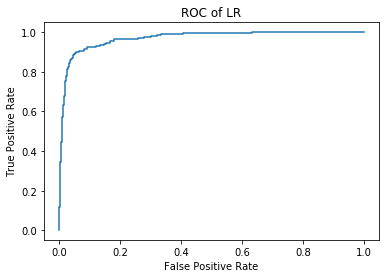

In [56]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_true, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of LR')
plt.show()

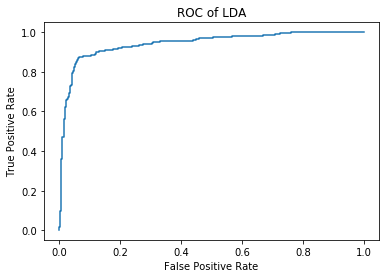

In [57]:
fpr, tpr, _ = roc_curve(y_true, lda.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of LDA')
plt.show()

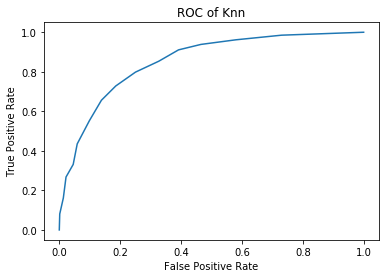

In [53]:
fpr, tpr, _ = roc_curve(y_true, knn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Knn')
plt.show()

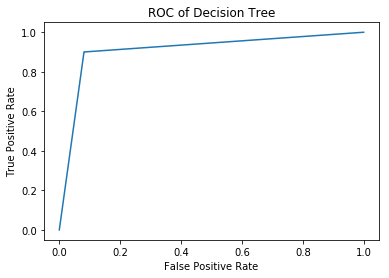

In [54]:
fpr, tpr, _ = roc_curve(y_true, decisionTree.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Decision Tree')
plt.show()

In [60]:
from sklearn.metrics import roc_auc_score
LRAuc = roc_auc_score(y_true, model.predict_proba(X_test)[:,1])
LDAAuc = roc_auc_score(y_true, lda.predict_proba(X_test)[:,1])
KnnAuc = roc_auc_score(y_true, knn.predict_proba(X_test)[:,1])
DecisionTreeAuc = roc_auc_score(y_true, decisionTree.predict_proba(X_test)[:,1])
print("LR AUC:", LRAuc, "LDA AUC:", LDAAuc, "Knn AUC:", KnnAuc, "DecisionTree AUC", DecisionTreeAuc)

LR AUC: 0.9704386055426834 LDA AUC: 0.9433192937034292 Knn AUC: 0.8552729910665429 DecisionTree AUC 0.9095194319109218
